In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
import os
import relative_accuracy as ra
from statistics import mean, stdev
import geh as ga

In [3]:
import keras_tuner as kt
from keras_tuner import RandomSearch

In [4]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [5]:
# Load all Inputs and Output Data

# 5 mins (1 step ahead)
Deep_train_5   = np.load("Deep_train_5_multi.npz")['x'] 
Output_train_5 = np.load("Deep_train_5_multi.npz")['y']

Deep_test_5   = np.load("Deep_test_5_multi.npz")['x'] 
Output_test_5 = np.load("Deep_test_5_multi.npz")['y'] 

# 15 mins (3 steps ahead)
Deep_train_15   = np.load("Deep_train_15_multi.npz")['x'] 
Output_train_15 = np.load("Deep_train_15_multi.npz")['y']

Deep_test_15   = np.load("Deep_test_15_multi.npz")['x'] 
Output_test_15 = np.load("Deep_test_15_multi.npz")['y']

# 30 mins (6 steps ahead)
Deep_train_30   = np.load("Deep_train_30_multi.npz")['x'] 
Output_train_30 = np.load("Deep_train_30_multi.npz")['y']

Deep_test_30   = np.load("Deep_test_30_multi.npz")['x'] 
Output_test_30 = np.load("Deep_test_30_multi.npz")['y']

# 60 mins (12 steps ahead)
Deep_train_60   = np.load("Deep_train_60_multi.npz")['x'] 
Output_train_60 = np.load("Deep_train_60_multi.npz")['y']

Deep_test_60   = np.load("Deep_test_60_multi.npz")['x'] 
Output_test_60 = np.load("Deep_test_60_multi.npz")['y']

In [6]:
scaler_filename = "scaler.save"
scaler = joblib.load(scaler_filename) 

C:\Users\mesug\anaconda3\envs\my_env\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [7]:
Test      = pd.read_csv('01test_scaled.csv', index_col=None, parse_dates=[0])

# Reshape Samples

The first step is to split the input sequences into subsequences that can be processed by the CNN model. Here, each spatio-temporal sample can be split into three sub-samples, each with five time steps. The CNN can interpret each subsequence of five time steps and provide a time series of interpretations of the subsequences to the LSTM model to process as input.

In [8]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 7              # No of loop detectors
n_seq = 3                    # Subsequences
n_steps = 5                  # time-step per subsequence
val_percent = 0.12962        # 2 weeks
batch_size = 32

#### 5 mins

In [9]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt5 = Deep_train_5.reshape((Deep_train_5.shape[0], n_seq, n_steps, n_features))
yt5 = scaler.inverse_transform(Output_train_5)

In [10]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv5 = Deep_test_5.reshape((Deep_test_5.shape[0], n_seq, n_steps, n_features))
yv5 = scaler.inverse_transform(Output_test_5)

#### 15 mins

In [11]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt15 = Deep_train_15.reshape((Deep_train_15.shape[0], n_seq, n_steps, n_features))
yt15 = scaler.inverse_transform(Output_train_15)

In [12]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv15 = Deep_test_15.reshape((Deep_test_15.shape[0], n_seq, n_steps, n_features))
yv15 = scaler.inverse_transform(Output_test_15)

#### 30 mins

In [13]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt30 = Deep_train_30.reshape((Deep_train_30.shape[0], n_seq, n_steps, n_features))
yt30 = scaler.inverse_transform(Output_train_30)

In [14]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv30 = Deep_test_30.reshape((Deep_test_30.shape[0], n_seq, n_steps, n_features))
yv30 = scaler.inverse_transform(Output_test_30)

#### 60 mins

In [15]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt60 = Deep_train_60.reshape((Deep_train_60.shape[0], n_seq, n_steps, n_features))
yt60 = scaler.inverse_transform(Output_train_60)

In [16]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv60 = Deep_test_60.reshape((Deep_test_60.shape[0], n_seq, n_steps, n_features))
yv60 = scaler.inverse_transform(Output_test_60)

### Reshaping the Data for Conv2D layer

For Conv2D, there is a need to add one more dimension to show we're dealing with 1 channel (since technically the images are in black and white, only showing values from 0-max flow on a single channel).

Conv1D - strides in 1 dimension
Conv2D - strides in 2 dimensions

In [17]:
# define no_of_channels
n_channels = 1

In [18]:
# Train data
Xt5  =  Xt5.reshape(Xt5.shape[0], n_seq, n_steps, n_features, n_channels)
Xt15 =  Xt15.reshape(Xt15.shape[0], n_seq, n_steps, n_features, n_channels)
Xt30 =  Xt30.reshape(Xt30.shape[0], n_seq, n_steps, n_features, n_channels)
Xt60 =  Xt60.reshape(Xt60.shape[0], n_seq, n_steps, n_features, n_channels)

# Validation data
Xv5  =  Xv5.reshape(Xv5.shape[0], n_seq, n_steps, n_features, n_channels)
Xv15 =  Xv15.reshape(Xv15.shape[0], n_seq, n_steps, n_features, n_channels)
Xv30 =  Xv30.reshape(Xv30.shape[0], n_seq, n_steps, n_features, n_channels)
Xv60 =  Xv60.reshape(Xv60.shape[0], n_seq, n_steps, n_features, n_channels)

In [19]:
Xv5.shape

(4017, 3, 5, 7, 1)

# CNN-LSTM model

In [20]:
from tensorflow import keras

# Early Stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [21]:
stop = keras.callbacks.EarlyStopping(
    monitor = 'val_loss', 
    patience = 5,
    restore_best_weights = True)

# 5 mins ahead

In [22]:
def build_model_5(hp):
    # Inputs
    channel_Deep = keras.layers.Input(shape=(None, n_steps, n_features, n_channels), name="DeepInput")
    
    # Deep Model
    # CNN 
    CNN_5 = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    flatten_5 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_5)
    # LSTM          
    LSTM_5 = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu')(flatten_5)
    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(LSTM_5)
    
    # Model
    model_5 = keras.Model(inputs=[channel_Deep], outputs=[output])

    # Compile
    model_5.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss='mse',metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_5

In [23]:
tuner5 = RandomSearch(
    build_model_5,
    objective="val_loss",
    max_trials=30,
    executions_per_trial=2,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="7bi-CNN-LSTM-5",
)

In [24]:
tuner5.search_space_summary()

Search space summary
Default search space size: 4
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
units_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [25]:
tuner5.search(Xt5, yt5, epochs=200,
           validation_split = val_percent,
           callbacks = [early_stop],
           verbose=2)

Trial 30 Complete [00h 11m 32s]
val_loss: 0.0020695372950285673

Best val_loss So Far: 0.0019088700646534562
Total elapsed time: 04h 23m 58s
INFO:tensorflow:Oracle triggered exit


In [26]:
tuner5.results_summary(1)

Results summary
Results in C:\Runs\7bi-CNN-LSTM-5
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
filters: 192
kernel_size: 3
units_LSTM: 66
learning_rate: 0.001
Score: 0.0019088700646534562


### Best Model

In [27]:
best_hp5 = tuner5.get_best_hyperparameters()[0]
model5 = tuner5.hypermodel.build(best_hp5)

In [28]:
scaler_filename = "Best_HP/7bi-ConvLSTM-5"
joblib.dump(best_hp5, scaler_filename) 

['Best_HP/7bi-ConvLSTM-5']

In [29]:
model5.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 DeepInput (InputLayer)      [(None, None, 5, 7, 1)]   0         
                                                                 
 time_distributed_2 (TimeDis  (None, None, 3, 5, 192)  1920      
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, None, 2880)       0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 66)                778008    
                                                                 
 output (Dense)              (None, 7)                 469       
                                                                 
Total params: 780,397
Trainable params: 780,397
Non-trainab

In [30]:
model5.fit((Xt5), yt5, 
           epochs = 100, 
           verbose = 0)

In [31]:
model5.save("my_dir/7bi-CNN-LSTM-5")

INFO:tensorflow:Assets written to: my_dir/7bi-CNN-LSTM-5\assets


INFO:tensorflow:Assets written to: my_dir/7bi-CNN-LSTM-5\assets


In [32]:
metrics5 = pd.DataFrame(model5.history.history)

<AxesSubplot:>

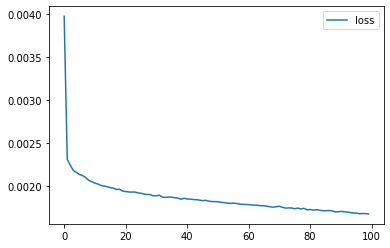

In [33]:
metrics5[['loss']].plot()

In [22]:
model5 = keras.models.load_model("my_dir/7bi-CNN-LSTM-5") 

In [23]:
scaler.inverse_transform(model5.predict(Xv5))

array([[ 72.172104,  70.32613 ,  78.017685, ...,  78.61559 ,  51.35815 ,
         49.0613  ],
       [ 68.23892 ,  67.41673 ,  72.788864, ...,  72.172134,  46.00772 ,
         45.46342 ],
       [ 67.076935,  65.89457 ,  72.280846, ...,  73.25002 ,  52.2437  ,
         53.137806],
       ...,
       [132.55228 , 137.44345 , 146.5142  , ..., 147.10747 ,  99.05335 ,
         86.27749 ],
       [120.32839 , 123.889336, 127.238686, ..., 119.94153 ,  83.95683 ,
         74.45447 ],
       [123.421555, 128.01428 , 137.45435 , ..., 140.78885 , 100.19874 ,
         90.54281 ]], dtype=float32)

### Evaluation on inverse_transform

In [24]:
test_predictions5 = scaler.inverse_transform(model5.predict(Xv5))


MSE5 = mean_squared_error(yv5,test_predictions5)

MAE5 = mean_absolute_error(yv5,test_predictions5)

RMSE5 = np.sqrt(MSE5)

MAPE5 = mean_absolute_percentage_error(yv5,test_predictions5)*100

eval5 = [MSE5, MAE5, RMSE5, MAPE5]
print(eval5)

[481.7463766379284, 16.57580846983685, 21.948721526274106, 8.577507938451777]


In [25]:
GEH, count = ga.GEH(np.asarray(yv5), np.asarray(test_predictions5))
GEH5 = count/GEH.size
print(GEH5)

0.6973220953803478


# 15 mins ahead

In [38]:
def build_model_15(hp):
    # Inputs
    channel_Deep = keras.layers.Input(shape=(None, n_steps, n_features, n_channels), name="DeepInput")
    
    # Deep Model
    # CNN 
    CNN_15 = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    flatten_15 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_15)
    # LSTM          
    LSTM_15 = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu')(flatten_15)
        
    # Output
    output = keras.layers.Dense(n_features, name= "output")(LSTM_15)
    
    # Model
    model_15 = keras.Model(inputs=[channel_Deep], outputs=[output])

    # Compile
    model_15.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss='mse',metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_15

In [39]:
tuner15 = RandomSearch(
    build_model_15,
    objective="val_loss",
    max_trials=30,
    executions_per_trial=2,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="7bi-CNN-LSTM-15",
)

In [40]:
tuner15.search_space_summary()

Search space summary
Default search space size: 4
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
units_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [41]:
tuner15.search((Xt15), yt15, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop], 
            verbose=2)

Trial 30 Complete [00h 14m 42s]
val_loss: 0.0025676817167550325

Best val_loss So Far: 0.002472556894645095
Total elapsed time: 05h 15m 12s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [42]:
tuner15.results_summary(1)

Results summary
Results in C:\Runs\7bi-CNN-LSTM-15
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
filters: 224
kernel_size: 2
units_LSTM: 75
learning_rate: 0.0001
Score: 0.002472556894645095


### Best model

In [43]:
best_hp15 = tuner15.get_best_hyperparameters()[0]
model15 = tuner15.hypermodel.build(best_hp15)

In [44]:
scaler_filename = "Best_HP/7bi-ConvLSTM-15"
joblib.dump(best_hp15, scaler_filename) 

['Best_HP/7bi-ConvLSTM-15']

In [45]:
model15.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 DeepInput (InputLayer)      [(None, None, 5, 7, 1)]   0         
                                                                 
 time_distributed_2 (TimeDis  (None, None, 4, 6, 224)  1120      
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, None, 5376)       0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 75)                1635600   
                                                                 
 output (Dense)              (None, 7)                 532       
                                                                 
Total params: 1,637,252
Trainable params: 1,637,252
Non-tra

In [46]:
model15.fit((Xt15), yt15, 
            epochs = 100, 
            verbose = 0)

In [47]:
model15.save("my_dir/7bi-ConvLSTM-15")

INFO:tensorflow:Assets written to: my_dir/7bi-ConvLSTM-15\assets


INFO:tensorflow:Assets written to: my_dir/7bi-ConvLSTM-15\assets


In [48]:
metrics15 = pd.DataFrame(model15.history.history)

<AxesSubplot:>

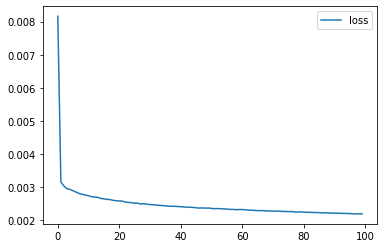

In [49]:
metrics15[['loss']].plot()

In [26]:
model15 = keras.models.load_model("my_dir/7bi-ConvLSTM-15")

In [27]:
scaler.inverse_transform(model15.predict(Xv15))

array([[ 64.40535 ,  65.328514,  71.98221 , ...,  70.90909 ,  50.85319 ,
         48.799694],
       [ 60.692795,  62.527943,  69.15043 , ...,  65.52841 ,  48.923817,
         47.03217 ],
       [ 60.29981 ,  62.300335,  67.57941 , ...,  67.64917 ,  47.114166,
         45.74322 ],
       ...,
       [137.0278  , 139.52312 , 146.50882 , ..., 151.77467 , 105.4384  ,
         90.24689 ],
       [130.68715 , 133.7516  , 139.82736 , ..., 142.4731  ,  97.77212 ,
         81.619125],
       [125.60236 , 126.97989 , 135.66264 , ..., 131.51971 ,  91.14835 ,
         76.41634 ]], dtype=float32)

### Evaluation on inverse_transform

In [28]:
test_predictions15 = scaler.inverse_transform(model15.predict(Xv15))


MSE15 = mean_squared_error(yv15,test_predictions15)

MAE15 = mean_absolute_error(yv15,test_predictions15)

RMSE15 = np.sqrt(MSE15)

MAPE15 = mean_absolute_percentage_error(yv15,test_predictions15)*100

eval15 = [MSE15, MAE15, RMSE15, MAPE15]
print(eval15)

[578.0885341063614, 18.306266575575595, 24.043471756515558, 9.573582996443301]


In [29]:
GEH, count = ga.GEH(np.asarray(yv15), np.asarray(test_predictions15))
GEH15 = count/GEH.size
print(GEH15)

0.6449030421633162


# 30 mins ahead

In [39]:
def build_model_30(hp):
    # Input
    channel_Deep = keras.layers.Input(shape=(None, n_steps, n_features, n_channels), name="DeepInput")
    
    # Deep Model
    # CNN 
    CNN_30 = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    flatten_30 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_30)
    # LSTM          
    LSTM_30 = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu')(flatten_30)
    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(LSTM_30)
    
    # Model
    model_30 = keras.Model(inputs=[channel_Deep], outputs=[output])

    # Compile
    model_30.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss='mse',metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_30

In [40]:
tuner30 = RandomSearch(
    build_model_30,
    objective="val_loss",
    max_trials=30,
    executions_per_trial=2,
    overwrite=True,
    directory=os.path.normpath('C:/Runs'),
    project_name="7bi-CNN-LSTM-30",
)

In [41]:
tuner30.search_space_summary()

Search space summary
Default search space size: 4
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
units_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [42]:
tuner30.search((Xt30), yt30, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop],
            verbose=2)

Trial 30 Complete [00h 11m 41s]
val_loss: 774.5326232910156

Best val_loss So Far: 725.2768859863281
Total elapsed time: 04h 51m 09s
INFO:tensorflow:Oracle triggered exit


In [43]:
tuner30.results_summary(1)

Results summary
Results in C:\Runs\7bi-CNN-LSTM-30
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
filters: 320
kernel_size: 2
units_LSTM: 79
learning_rate: 0.001
Score: 725.2768859863281


### Best model

In [44]:
best_hp30 = tuner30.get_best_hyperparameters()[0]
model30 = tuner30.hypermodel.build(best_hp30)

In [45]:
scaler_filename = "7bi-ConvLSTM-30"
joblib.dump(best_hp30, scaler_filename) 

['7bi-ConvLSTM-30']

In [46]:
model30.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 DeepInput (InputLayer)      [(None, None, 5, 7, 1)]   0         
                                                                 
 time_distributed_2 (TimeDis  (None, None, 4, 6, 320)  1600      
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, None, 7680)       0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 79)                2452160   
                                                                 
 output (Dense)              (None, 7)                 560       
                                                                 
Total params: 2,454,320
Trainable params: 2,454,320
Non-tra

In [47]:
model30.fit(Xt30, yt30, 
            epochs = 100, 
            verbose = 0)

In [48]:
model30.save("my_dir/7bi-CNN-LSTM-30")

INFO:tensorflow:Assets written to: my_dir/7bi-CNN-LSTM-30\assets


INFO:tensorflow:Assets written to: my_dir/7bi-CNN-LSTM-30\assets


In [49]:
metrics30 = pd.DataFrame(model30.history.history)

<AxesSubplot:>

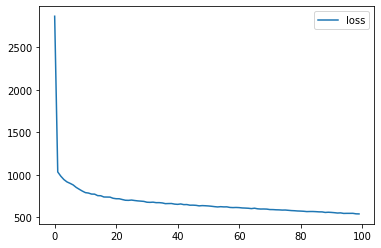

In [50]:
metrics30[['loss']].plot()

In [51]:
model30 = keras.models.load_model("my_dir/7bi-CNN-LSTM-30")

In [52]:
model30.predict(Xv30)

array([[ 53.227154,  57.95735 ,  62.202076, ...,  62.79083 ,  49.09149 ,
         46.504597],
       [ 56.257835,  62.177284,  65.18349 , ...,  62.6181  ,  42.94534 ,
         40.012547],
       [ 54.56296 ,  60.125862,  62.845028, ...,  60.009785,  40.328087,
         38.197292],
       ...,
       [144.12274 , 150.4546  , 162.63882 , ..., 163.17117 , 112.956345,
         95.84768 ],
       [132.30602 , 136.62448 , 148.57663 , ..., 147.86517 , 100.57875 ,
         86.36862 ],
       [120.566246, 124.64361 , 136.68549 , ..., 135.4649  ,  88.94336 ,
         76.348755]], dtype=float32)

### Evaluation on inverse_transform

In [53]:
test_predictions30 = model30.predict(Xv30)


MSE30 = mean_squared_error(yv30,test_predictions30)

MAE30 = mean_absolute_error(yv30,test_predictions30)

RMSE30 = np.sqrt(MSE30)

MAPE30 = mean_absolute_percentage_error(yv30,test_predictions30)*100

eval30 = [MSE30, MAE30, RMSE30, MAPE30]
print(eval30)

[678.3079623631269, 19.750098726345662, 26.044346072864393, 10.309270370860947]


In [54]:
GEH, count = ga.GEH(np.asarray(yv30), np.asarray(test_predictions30))
GEH30 = count/GEH.size
print(GEH30)

0.6122703318615582


# 60 mins ahead

In [55]:
def build_model_60(hp):
    # Inputs
    channel_Deep = keras.layers.Input(shape=(None, n_steps, n_features, n_channels), name="DeepInput")
    
    # Deep Model
    # CNN 
    CNN_60 = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    flatten_60 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_60)
    # LSTM          
    LSTM_60 = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu')(flatten_60)
    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(LSTM_60)
    
    # Model
    model_60 = keras.Model(inputs=[channel_Deep], outputs=[output])

    # Compile
    model_60.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss='mse',metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_60

In [56]:
tuner60 = RandomSearch(
    build_model_60,
    objective="val_loss",
    max_trials=30,
    executions_per_trial=2,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="7bi-CNN-LSTM-60",
)

In [57]:
tuner60.search_space_summary()

Search space summary
Default search space size: 4
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
units_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [58]:
tuner60.search((Xt60), yt60, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop],
            verbose=2)

Trial 30 Complete [00h 09m 31s]
val_loss: 945.3741760253906

Best val_loss So Far: 912.2949829101562
Total elapsed time: 07h 43m 33s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [59]:
tuner60.results_summary(1)

Results summary
Results in C:\Runs\7bi-CNN-LSTM-60
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
filters: 384
kernel_size: 3
units_LSTM: 94
learning_rate: 0.001
Score: 912.2949829101562


### Best model

In [60]:
best_hp60 = tuner60.get_best_hyperparameters()[0]
model60 = tuner60.hypermodel.build(best_hp60)

In [61]:
scaler_filename = "Best_HP/7b-ConvLSTM-60"
joblib.dump(best_hp60, scaler_filename) 

['Best_HP/7b-ConvLSTM-60']

In [62]:
model60.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 DeepInput (InputLayer)      [(None, None, 5, 7, 1)]   0         
                                                                 
 time_distributed_2 (TimeDis  (None, None, 3, 5, 384)  3840      
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, None, 5760)       0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 94)                2201480   
                                                                 
 output (Dense)              (None, 7)                 665       
                                                                 
Total params: 2,205,985
Trainable params: 2,205,985
Non-tra

In [63]:
model60.fit(Xt60, yt60, 
            epochs = 100, 
            verbose = 0
            )

In [64]:
model60.save("my_dir/7bi-CNN-LSTM-60")

INFO:tensorflow:Assets written to: my_dir/7bi-CNN-LSTM-60\assets


INFO:tensorflow:Assets written to: my_dir/7bi-CNN-LSTM-60\assets


In [65]:
metrics60 = pd.DataFrame(model60.history.history)

<AxesSubplot:>

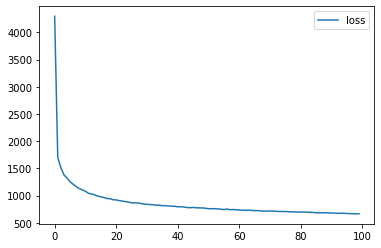

In [66]:
metrics60[['loss']].plot()

In [67]:
model60 = keras.models.load_model("my_dir/7bi-CNN-LSTM-60")

In [68]:
model60.predict(Xv60)

array([[ 51.47103 ,  52.724342,  59.692455, ...,  54.78416 ,  39.078884,
         37.666073],
       [ 48.199375,  47.856564,  55.505882, ...,  50.68153 ,  36.82517 ,
         35.393387],
       [ 49.92693 ,  50.239414,  56.806347, ...,  53.532036,  38.6677  ,
         37.3957  ],
       ...,
       [130.6275  , 138.21155 , 147.34818 , ..., 145.7474  , 103.637596,
         90.64933 ],
       [127.296684, 135.12746 , 143.51471 , ..., 139.59048 ,  95.07034 ,
         83.01867 ],
       [116.15417 , 121.71441 , 130.62885 , ..., 127.0106  ,  85.59359 ,
         75.3763  ]], dtype=float32)

### Evaluation on inverse_transform

In [69]:
test_predictions60 = model60.predict(Xv60)


MSE60 = mean_squared_error(yv60,test_predictions60)

MAE60 = mean_absolute_error(yv60,test_predictions60)

RMSE60 = np.sqrt(MSE60)

MAPE60 = mean_absolute_percentage_error(yv60,test_predictions60)*100

eval60 = [MSE60, MAE60, RMSE60, MAPE60]
print(eval60)

[724.7708326028759, 20.4477366301279, 26.921568167602643, 10.693271209671622]


In [70]:
GEH, count = ga.GEH(np.asarray(yv60), np.asarray(test_predictions60))
GEH60 = count/GEH.size
print(GEH60)

0.5957135724983953


# RESULTS

## General results

In [71]:
l = ['MSE','MAE','RMSE','MAPE','Horizon']

In [72]:
eval5.append(5)
eval15.append(15)
eval30.append(30)
eval60.append(60)

In [73]:
df = pd.DataFrame(np.array([eval5,eval15,eval30,eval60]),columns=l)
df.set_index('Horizon')

,MSE,MAE,RMSE,MAPE
Horizon,,,,
5.0,481.746377,16.575808,21.948722,8.577508
15.0,578.088534,18.306267,24.043472,9.573583
30.0,678.307962,19.750099,26.044346,10.309270
60.0,724.770833,20.447737,26.921568,10.693271


## GEH

In [74]:
n = [' 5 ',' 15 ',' 30 ',' 60 ']
df2 = pd.DataFrame(np.array([[GEH5, GEH15, GEH30, GEH60]]), columns=n)
print(df2)

         5        15       30        60 
0  0.697322  0.644903  0.61227  0.595714
